<a href="https://colab.research.google.com/github/zrruziev/Deep_Learning_Practice/blob/main/TDC/C1_W4_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download horses_or_humans dataset

In [2]:
%%writefile download.sh

#!/bin/bash
fileid="1onaG42NZft3wCE1WH0GDEbUhu75fedP5"
filename="horse-or-human.zip"
html=`curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}"`
curl -Lb ./cookie "https://drive.google.com/uc?export=download&`echo ${html}|grep -Po '(confirm=[a-zA-Z0-9\-_]+)'`&id=${fileid}" -o ${filename}

Writing download.sh


In [3]:
# NOTE: Please only run this if downloading with gdown did not work.
# This will run the script created above.
!bash download.sh


# Extract the dataset to data folder("> /dev/null" hides command line message)
!unzip horse-or-human.zip -d data/ > /dev/null

# Delete zipfile and download.sh file extracting
!rm -rf horse-or-human.zip download.sh 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  142M  100  142M    0     0  49.7M      0  0:00:02  0:00:02 --:--:-- 87.5M


###*One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. You will use the ImageDataGenerator API instead -- and this is coded to automatically label images according to the directory names and structure. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageDataGenerator will label the images appropriately for you, reducing a coding step.*

In [4]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join("./data/horses")

# Directory with our training human pictures
train_human_dir = os.path.join("./data/humans")


In [5]:
# Print some filenames in the horses and humans training directories:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse43-9.png', 'horse22-5.png', 'horse01-9.png', 'horse38-4.png', 'horse48-0.png', 'horse33-7.png', 'horse39-2.png', 'horse21-9.png', 'horse04-5.png', 'horse50-3.png']
['human04-13.png', 'human11-00.png', 'human17-29.png', 'human17-02.png', 'human13-06.png', 'human17-11.png', 'human13-04.png', 'human15-04.png', 'human06-03.png', 'human04-02.png']


In [6]:
print(f'total training horse images: {len(os.listdir(train_human_dir))}')
print(f'total training human images: {len(os.listdir(train_horse_dir))}')

total training horse images: 527
total training human images: 500


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

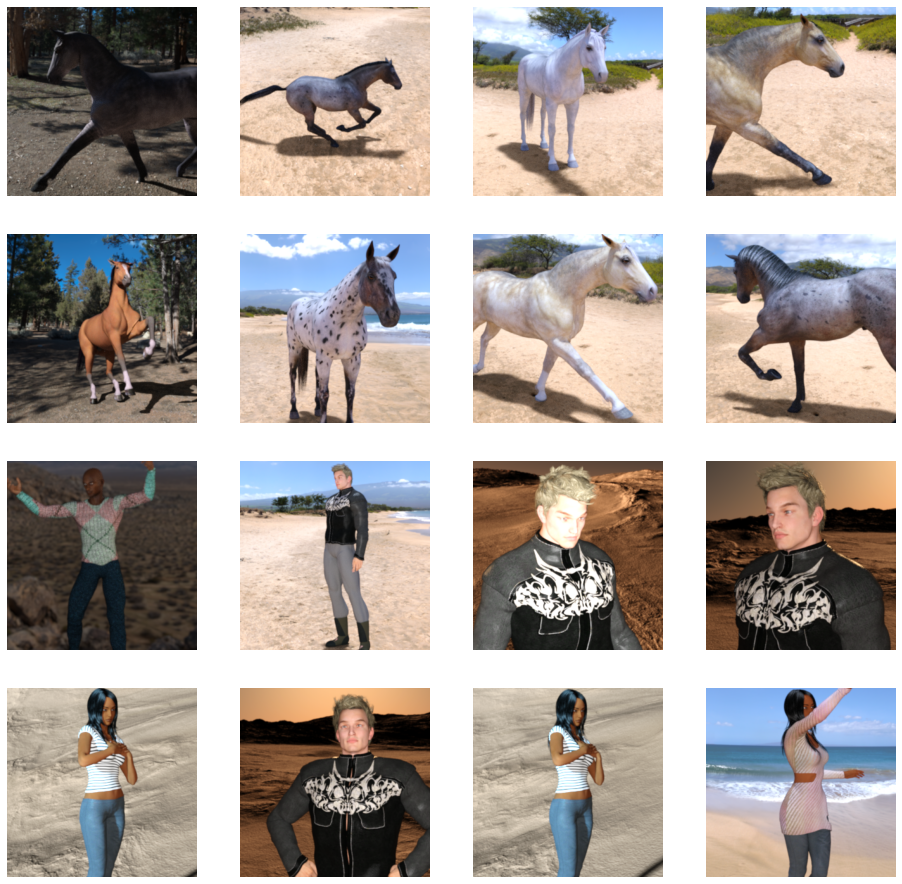

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index +=8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplots; subplot indeices start at 1
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

##Data Preprocessing

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training imagesin batches of 128 using train generator
train_generator = train_datagen.flow_from_directory(
                                './data/',  # This is the source directory for training images
                                target_size=(300,300),  # All images will be resized to 300x300
                                batch_size=128,
                                # Since we use binary_crossentropy loss, we need binary labels
                                class_mode='binary') 

Found 1027 images belonging to 2 classes.


In [14]:
hist = model.fit(
    train_generator,
    # steps_per_epoch=8,
    epochs=15)

Epoch 1/15
9/9 [==============================] - 21s 1s/step - loss: 1.3844 - accuracy: 0.4927
Epoch 2/15
9/9 [==============================] - 8s 869ms/step - loss: 0.6584 - accuracy: 0.6923
Epoch 3/15
9/9 [==============================] - 8s 842ms/step - loss: 0.4802 - accuracy: 0.7809
Epoch 4/15
9/9 [==============================] - 8s 869ms/step - loss: 0.5167 - accuracy: 0.8043
Epoch 5/15
9/9 [==============================] - 8s 860ms/step - loss: 0.7321 - accuracy: 0.8384
Epoch 6/15
9/9 [==============================] - 8s 839ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 7/15
9/9 [==============================] - 8s 836ms/step - loss: 0.2161 - accuracy: 0.9056
Epoch 8/15
9/9 [==============================] - 8s 868ms/step - loss: 0.2010 - accuracy: 0.9387
Epoch 9/15
9/9 [==============================] - 8s 854ms/step - loss: 0.0493 - accuracy: 0.9834
Epoch 10/15
9/9 [==============================] - 8s 860ms/step - loss: 0.3260 - accuracy: 0.8851
Epoch 11/15
9/9 [====

## Make Predictions by testing

In [15]:
import numpy as np
from keras.preprocessing import image


# Upload an image or images from your computer
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300,300))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(f'\n{classes}')

    if classes[0]>0.5:
        print(f'{fn} is a human')
    else:
        print(f'{fn} is a horse')

Saving gene-devine-ahxNfsInPVM-unsplash.jpg to gene-devine-ahxNfsInPVM-unsplash.jpg
Saving karina-carvalho-fKTKVrNqXQQ-unsplash.jpg to karina-carvalho-fKTKVrNqXQQ-unsplash.jpg
Saving louise-pilgaard-l263JvA7q2E-unsplash.jpg to louise-pilgaard-l263JvA7q2E-unsplash.jpg
Saving sylas-boesten-4csA42uPfEo-unsplash.jpg to sylas-boesten-4csA42uPfEo-unsplash.jpg

[[1.2924218e-06]]
gene-devine-ahxNfsInPVM-unsplash.jpg is a horse

[[0.98824173]]
karina-carvalho-fKTKVrNqXQQ-unsplash.jpg is a human

[[0.0142999]]
louise-pilgaard-l263JvA7q2E-unsplash.jpg is a horse

[[0.9977998]]
sylas-boesten-4csA42uPfEo-unsplash.jpg is a human


In [16]:
# Delete all files Not folders
!find /content/ -maxdepth 1 -type f  # it shows files that are deleting
!find /content/ -maxdepth 1 -type f -delete  # it deletes files mentioned above

/content/gene-devine-ahxNfsInPVM-unsplash.jpg
/content/karina-carvalho-fKTKVrNqXQQ-unsplash.jpg
/content/louise-pilgaard-l263JvA7q2E-unsplash.jpg
/content/sylas-boesten-4csA42uPfEo-unsplash.jpg


##Visualizing Intermediate Representations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


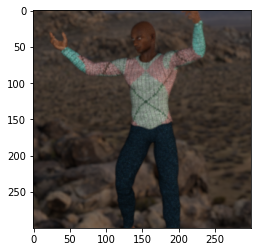

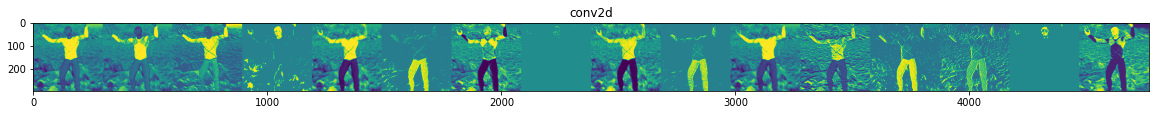

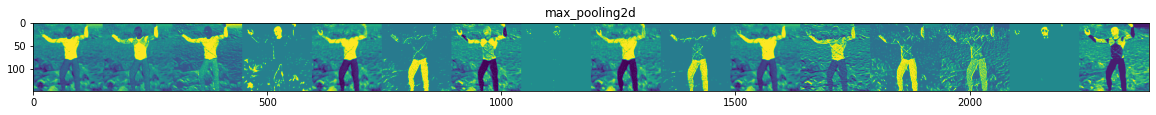

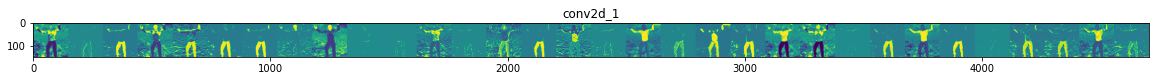

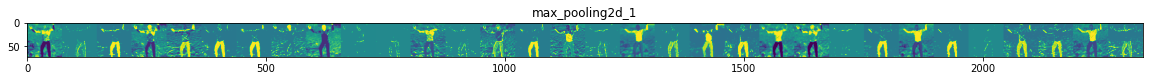

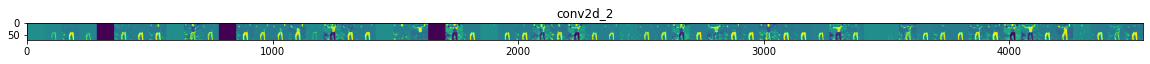

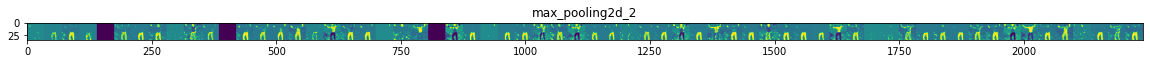

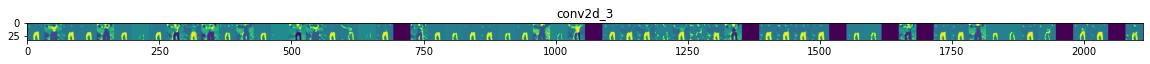

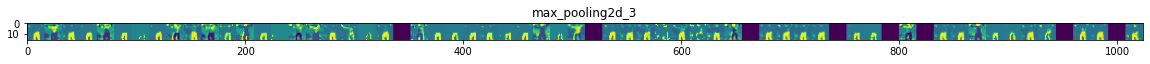

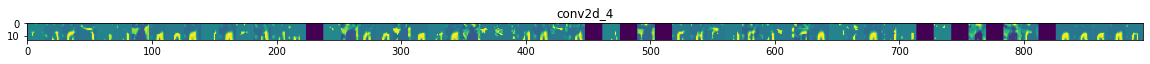

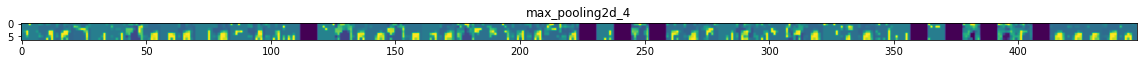

In [39]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image

# Show the image itself
plt.imshow(img)
#######################

x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[0:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis');